<a href="https://colab.research.google.com/github/AayushSangani/ML/blob/master/ML_07_J040_240820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment 7**

# Aim: Classification using Neural Network Models

Objectives:

Perform classifications on the given datasets.

Tackle null values, correct mismatched data types, plot correlation matrix as heatmap and do preprocessing as needed.

Select the correct architecture for maximum accuracy on cross validation & test set.

Plot accuracy vs validation acc and loss vs validation loss during epochs

List the hyper-parameters used and callbacks.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_covtype, fetch_kddcup99, load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from keras import models
from keras import layers
from keras.utils import to_categorical

# 1. Forest Cover Type

In [ ]:
forest_cover = fetch_covtype()

In [ ]:
x_forest_cover = forest_cover.data
y_forest_cover = forest_cover.target

x_forest = pd.DataFrame(x_forest_cover)
y_forest = pd.DataFrame(y_forest_cover)
print(x_forest.shape)
print(y_forest.shape)

(581012, 54)
(581012, 1)


In [ ]:
x_forest.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
dtype: object

In [ ]:
y_forest.dtypes

0    int32
dtype: object

In [ ]:
x_forest.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
dtype: int64

In [ ]:
y_forest.isnull().sum()

0    0
dtype: int64

In [ ]:
corr_forest = x_forest.corr()
corr_forest

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,0.131838,0.238164,0.066550,-0.619374,-0.204512,-0.187677,-0.182463,-0.183521,-0.150376,-0.214606,-0.002252,-0.003021,-0.060915,-0.428746,-0.134227,-0.118905,-0.043984,-0.080825,-0.007153,-0.059446,-0.111028,-0.081811,0.033144,-0.043128,0.017557,0.158959,0.124356,0.053582,0.028753,-0.016657,0.035254,-0.029270,0.074327,-0.026667,0.070405,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612
1,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,-0.140123,0.055988,0.074904,0.082687,-0.007574,-0.005649,-0.002730,0.017212,0.008938,0.010766,-0.005052,-0.003366,-0.020800,0.049835,-0.064344,-0.070209,0.054544,0.007597,-0.002660,0.007846,-0.000168,-0.028353,-0.003635,-0.029440,0.032998,0.021578,0.013676,0.018164,-0.003265,-0.010661,0.011328,0.027535,-0.062181,-0.028922,0.001763,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866
2,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,-0.234576,-0.036253,0.125663,0.255503,0.107847,-0.018553,0.125497,0.131847,0.072311,0.003673,-0.015661,-0.023359,-0.032752,0.244037,-0.050894,-0.169300,0.192423,0.000228,0.001081,-0.034791,-0.040208,-0.045851,-0.083743,-0.077582,-0.025461,-0.053396,-0.207397,0.082434,0.026364,-0.021449,0.043695,0.067052,-0.082941,0.075864,-0.034610,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637
3,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.097124,0.055726,0.122028,-0.100433,-0.035096,-0.011569,-0.041211,-0.049071,-0.009370,-0.012916,0.004751,-0.000795,-0.021935,-0.071653,0.001399,0.014628,-0.002032,-0.038478,-0.002667,-0.067448,-0.071435,-0.013340,-0.043236,-0.078088,-0.039953,-0.051424,-0.132244,0.021927,0.016099,0.013408,0.052384,0.026210,-0.001025,-0.049960,0.073658,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020
4,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,-0.180710,-0.008709,0.146839,0.077792,0.015275,0.008954,0.008863,0.025066,0.026772,0.046259,-0.008485,-0.012915,-0.028476,0.055154,-0.020870,-0.044526,0.083482,-0.024281,-0.001744,-0.050909,-0.054191,-0.031692,-0.055635,-0.076727,-0.026116,-0.075679,-0.180098,0.037066,-0.013471,-0.011212,0.067086,0.071672,-0.075860,-0.011901,0.033609,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006
5,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,0.453913,-0.200411,-0.232933,-0.270349,-0.083585,-0.088026,-0.084988,-0.088524,-0.061607,-0.108328,0.020107,0.025805,-0.045813,-0.182955,-0.099293,0.054196,-0.054968,-0.033945,-0.003144,0.018083,-0.051825,-0.051243,0.068758,0.056595,-0.014890,0.046979,-0.007067,-0.032451,-0.034842,0.002521,0.003866,-0.032749,0.306324,0.077091,-0.058840,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052
6,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,0.201299,-0.006181,-0.100565,-0.200282,-0.000937,0.036253,0.039648,0.023812,-0.046514,-0.005665,0.003571,0.005000,0.021741,-0.223782,0.048371,0.092364,-0.073390,-0.010719,-0.000522,-0.006590,0.004700,0.031293,0.017103,0.024811,-0.014162,0.000252,0.036234,-0.112379,0.032783,0.027388,0.001638,-0.091435,0.081499,0.104003,-0.035114,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016
7,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,0.028728,0.042392,0.048646,-0.195733,-0.052561,0.043250,0.002702,0.084397,-0.062044,-0.010497,0.005282,0.009520,0.005446,-0.245854,-0.011993,0.058469,0.0

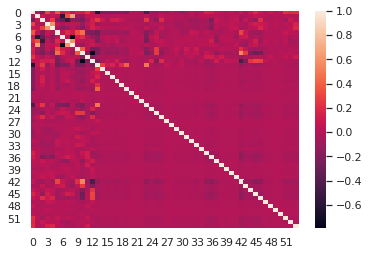

In [ ]:
sns.set()
ax_forest = sns.heatmap(corr_forest)

In [ ]:
y_fore = y_forest.replace([1,2,3,4,5,6,7], [0,1,2,3,4,5,6])
y_fore = to_categorical(y_fore)
x_train, x_test, y_train, y_test = train_test_split(x_forest, y_fore, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(464809, 54)
(58101, 54)
(58102, 54)
(464809, 7)
(58101, 7)
(58102, 7)


In [ ]:
nn_forest = models.Sequential()
nn_forest.add(layers.Dense(512, activation = 'relu', input_shape = (54, )))
nn_forest.add(layers.Dense(256, activation = 'tanh'))
nn_forest.add(layers.Dense(128, activation = 'tanh'))
nn_forest.add(layers.Dense(54, activation = 'relu'))
nn_forest.add(layers.Dense(7, activation = 'softmax'))
nn_forest.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
forest_his = nn_forest.fit(x_train, y_train, epochs = 100, batch_size = 4000, validation_data = (x_dev, y_dev))
nn_forest.evaluate(x_dev, y_dev)

Epoch 1/100
117/117 [==============================] - 13s 110ms/step - loss: 1.1686 - accuracy: 0.4700 - val_loss: 1.1827 - val_accuracy: 0.4246
Epoch 2/100
117/117 [==============================] - 13s 113ms/step - loss: 1.1119 - accuracy: 0.4931 - val_loss: 1.0827 - val_accuracy: 0.5038
Epoch 3/100
117/117 [==============================] - 13s 113ms/step - loss: 1.0822 - accuracy: 0.5029 - val_loss: 1.0265 - val_accuracy: 0.5172
Epoch 4/100
117/117 [==============================] - 13s 107ms/step - loss: 1.0451 - accuracy: 0.5181 - val_loss: 0.9954 - val_accuracy: 0.5280
Epoch 5/100
117/117 [==============================] - 12s 107ms/step - loss: 1.0154 - accuracy: 0.5284 - val_loss: 1.0068 - val_accuracy: 0.5293
Epoch 6/100
117/117 [==============================] - 12s 107ms/step - loss: 0.9837 - accuracy: 0.5435 - val_loss: 1.1290 - val_accuracy: 0.4390
Epoch 7/100
117/117 [==============================] - 12s 107ms/step - loss: 0.9564 - accuracy: 0.5606 - val_loss: 0.8924 -

[0.558793306350708, 0.7636701464653015]

In [ ]:
dev_acc = nn_forest.evaluate(x_dev, y_dev)[1]
print('Dev Accuracy:',dev_acc)

1816/1816 [==============================] - 3s 1ms/step - loss: 0.5588 - accuracy: 0.7637
Dev Accuracy: 0.7636701464653015


In [ ]:
test_acc = nn_forest.evaluate(x_test, y_test)[1]
print('Test Accuracy:',test_acc)

1816/1816 [==============================] - 2s 1ms/step - loss: 0.5649 - accuracy: 0.7600
Test Accuracy: 0.7599910497665405


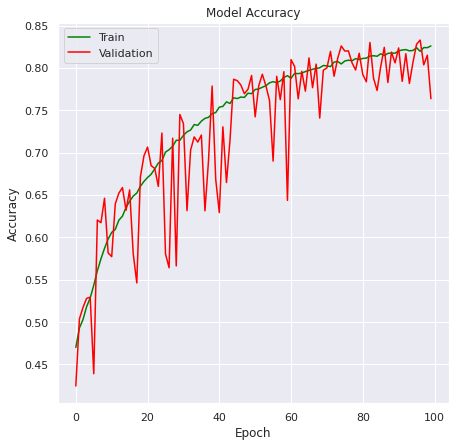

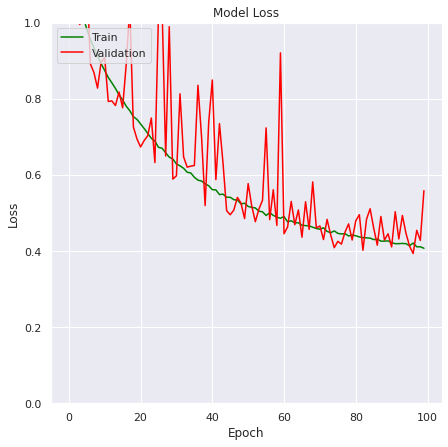

In [ ]:
plt.figure(figsize = (7,7))
plt.plot(forest_his.history['accuracy'], color = 'green')
plt.plot(forest_his.history['val_accuracy'], color = 'red')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (7,7))
plt.plot(forest_his.history['loss'], color = 'green')
plt.plot(forest_his.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# KDD 1999 Cup Dataset

In [ ]:
kdd_99 = fetch_kddcup99()

In [ ]:
x_kdd_99 = kdd_99.data
y_kdd_99 = kdd_99.target

x_kdd_99_cup = pd.DataFrame(x_kdd_99)
y_kdd_99_cup = pd.DataFrame(y_kdd_99)
print(x_kdd_99_cup.shape)
print(y_kdd_99_cup.shape)

(494021, 41)
(494021, 1)


In [ ]:
print(x_kdd_99_cup.dtypes)

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
30    object
31    object
32    object
33    object
34    object
35    object
36    object
37    object
38    object
39    object
40    object
dtype: object


In [ ]:
print(y_kdd_99_cup.dtypes)

0    object
dtype: object


In [ ]:
le = LabelEncoder()
for i in [1,2,3]:
  x_kdd_99_cup[i] = [j.decode('utf-8') for j in x_kdd_99_cup[i]]
  x_kdd_99_cup[i] = le.fit_transform(x_kdd_99_cup[i])

for i in range(x_kdd_99_cup.shape[1]):
  x_kdd_99_cup[i] = x_kdd_99_cup[i].astype('float')

In [ ]:
y_kdd_99 = [i.decode('utf-8') for i in y_kdd_99]
y_kdd_99 = pd.DataFrame(le.fit_transform(y_kdd_99))
y_kdd_99_cup = to_categorical(y_kdd_99)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_kdd_99_cup, y_kdd_99_cup, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(395216, 41)
(49402, 41)
(49403, 41)
(395216, 23)
(49402, 23)
(49403, 23)


In [ ]:
nn_kdd_99 = models.Sequential()
nn_kdd_99.add(layers.Dense(256, activation = 'relu', input_shape = (41, )))
nn_kdd_99.add(layers.Dense(128, activation = 'relu'))
nn_kdd_99.add(layers.Dense(64, activation = 'relu'))
nn_kdd_99.add(layers.Dense(32, activation = 'relu'))
nn_kdd_99.add(layers.Dense(23, activation = 'softmax'))
nn_kdd_99.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
kdd_99_hist = nn_kdd_99.fit(x_train, y_train, epochs = 5, batch_size = 1500, validation_data = (x_val, y_val))

Epoch 1/5
264/264 [==============================] - 4s 17ms/step - loss: 16.7970 - accuracy: 0.9325 - val_loss: 3.9732 - val_accuracy: 0.9777
Epoch 2/5
264/264 [==============================] - 4s 16ms/step - loss: 42.2322 - accuracy: 0.9815 - val_loss: 2.2879 - val_accuracy: 0.9928
Epoch 3/5
264/264 [==============================] - 4s 16ms/step - loss: 1.7959 - accuracy: 0.9828 - val_loss: 0.1318 - val_accuracy: 0.9949
Epoch 4/5
264/264 [==============================] - 4s 16ms/step - loss: 0.3914 - accuracy: 0.9886 - val_loss: 0.6042 - val_accuracy: 0.9942
Epoch 5/5
264/264 [==============================] - 4s 16ms/step - loss: 0.3701 - accuracy: 0.9898 - val_loss: 0.0755 - val_accuracy: 0.9913


In [ ]:
val_acc_kdd = nn_kdd_99.evaluate(x_val, y_val)[1]
print('Validation Accuracy:',val_acc_kdd)

1544/1544 [==============================] - 2s 1ms/step - loss: 0.0755 - accuracy: 0.9913
Validation Accuracy: 0.9912554025650024


In [ ]:
test_acc_kdd = nn_kdd_99.evaluate(x_test, y_test)[1]
print('Test Accuracy:', test_acc_kdd)

1544/1544 [==============================] - 2s 995us/step - loss: 0.0804 - accuracy: 0.9904
Test Accuracy: 0.9904459118843079


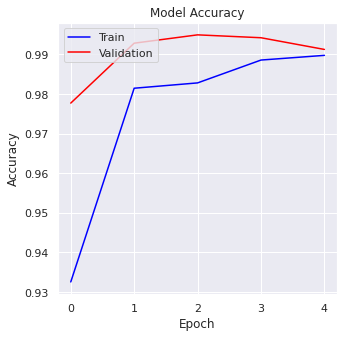

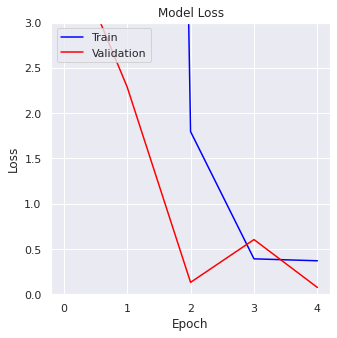

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(kdd_99_hist.history['accuracy'], color = 'blue')
plt.plot(kdd_99_hist.history['val_accuracy'], color = 'red')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (5, 5))
plt.plot(kdd_99_hist.history['loss'], color = 'blue')
plt.plot(kdd_99_hist.history['val_loss'], color = 'red')
plt.ylim((0,3))
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Breast Cancer Dataset

In [ ]:
cancer = load_breast_cancer()

In [ ]:
x_breast_cancer = cancer.data
y_breast_cancer = cancer.target

x_cancer = pd.DataFrame(x_breast_cancer)
y_cancer = pd.DataFrame(y_breast_cancer)
print(x_cancer.shape)
print(y_cancer.shape)

(569, 30)
(569, 1)


In [ ]:
print(x_cancer.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
dtype: object


In [ ]:
print(y_cancer.dtypes)

0    int64
dtype: object


In [ ]:
print(x_cancer.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64


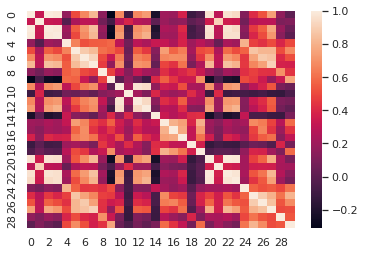

In [ ]:
corr_cancer = x_cancer.corr()
sns.set()
ax_cancer = sns.heatmap(corr_cancer)

In [ ]:
scaler = StandardScaler()
x_cancer = pd.DataFrame(scaler.fit_transform(x_cancer))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_cancer, y_cancer, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(455, 30)
(57, 30)
(57, 30)
(455, 1)
(57, 1)
(57, 1)


In [ ]:
nn_cancer = models.Sequential()
nn_cancer.add(layers.Dense(256, activation = 'relu', input_shape = (30, )))
nn_cancer.add(layers.Dense(125, activation = 'relu'))
nn_cancer.add(layers.Dense(1, activation = 'sigmoid'))
nn_cancer.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cancer_hist = nn_cancer.fit(x_train, y_train, epochs=15,batch_size=10, validation_data = (x_val, y_val))

Epoch 1/15
46/46 [==============================] - 0s 5ms/step - loss: 0.5109 - accuracy: 0.8352 - val_loss: 0.3684 - val_accuracy: 0.9298
Epoch 2/15
46/46 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.9429 - val_loss: 0.2594 - val_accuracy: 0.9474
Epoch 3/15
46/46 [==============================] - 0s 1ms/step - loss: 0.2348 - accuracy: 0.9451 - val_loss: 0.2055 - val_accuracy: 0.9474
Epoch 4/15
46/46 [==============================] - 0s 1ms/step - loss: 0.1916 - accuracy: 0.9473 - val_loss: 0.1753 - val_accuracy: 0.9474
Epoch 5/15
46/46 [==============================] - 0s 1ms/step - loss: 0.1654 - accuracy: 0.9538 - val_loss: 0.1554 - val_accuracy: 0.9474
Epoch 6/15
46/46 [==============================] - 0s 2ms/step - loss: 0.1475 - accuracy: 0.9560 - val_loss: 0.1410 - val_accuracy: 0.9474
Epoch 7/15
46/46 [==============================] - 0s 1ms/step - loss: 0.1347 - accuracy: 0.9626 - val_loss: 0.1304 - val_accuracy: 0.9474
Epoch 8/15
46/46 [==

In [ ]:
val_acc = nn_cancer.evaluate(x_val, y_val)[1]
print('Validation Accuracy:', val_acc)

test_acc = nn_cancer.evaluate(x_test, y_test)[1]
print('Test Accuracy:', test_acc)

2/2 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9649
Validation Accuracy: 0.9649122953414917
2/2 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9825
Test Accuracy: 0.9824561476707458


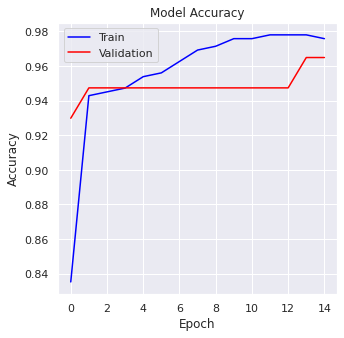

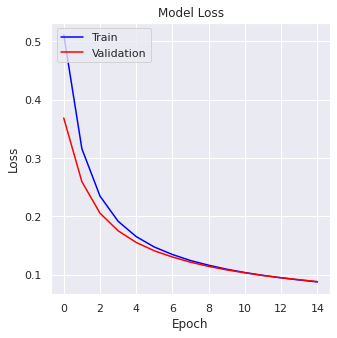

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(cancer_hist.history['accuracy'], color = 'blue')
plt.plot(cancer_hist.history['val_accuracy'], color = 'red')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (5,5))
plt.plot(cancer_hist.history['loss'], color = 'blue')
plt.plot(cancer_hist.history['val_loss'], color = 'red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Wine Dataset

In [ ]:
wine = load_wine()

In [ ]:
x_wine = wine.data
y_wine = wine.target

x_wine = pd.DataFrame(x_wine)
y_wine = pd.DataFrame(y_wine)
print(x_wine.shape)
print(y_wine.shape)

(178, 13)
(178, 1)


In [ ]:
x_wine.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

In [ ]:
y_wine.dtypes

0    int64
dtype: object

In [ ]:
x_wine.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [ ]:
y_wine.isnull().sum()

0    0
dtype: int64

In [ ]:
corr_wine = x_wine.corr()
corr_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


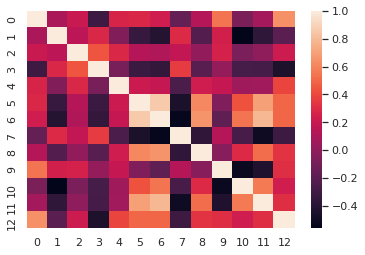

In [ ]:
import seaborn as sns; 
sns.set()
ax_wine = sns.heatmap(corr_wine)

In [ ]:
scaler = StandardScaler()
x_wine = pd.DataFrame(scaler.fit_transform(x_wine))

In [ ]:
y_wine = to_categorical(y_wine)
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(142, 13)
(18, 13)
(18, 13)
(142, 3)
(18, 3)
(18, 3)


In [ ]:
nn_wine = models.Sequential()
nn_wine.add(layers.Dense(256, activation = 'relu', input_shape = (13, )))
nn_wine.add(layers.Dense(128, activation = 'relu'))
nn_wine.add(layers.Dense(64, activation = 'relu'))
nn_wine.add(layers.Dense(3, activation = 'sigmoid'))
nn_wine.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
wine_hist = nn_wine.fit(x_train, y_train, epochs = 30, validation_data = (x_val, y_val))

Epoch 1/30
5/5 [==============================] - 0s 31ms/step - loss: 1.0949 - accuracy: 0.3521 - val_loss: 1.0781 - val_accuracy: 0.4444
Epoch 2/30
5/5 [==============================] - 0s 5ms/step - loss: 1.0847 - accuracy: 0.4507 - val_loss: 1.0691 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 0s 6ms/step - loss: 1.0746 - accuracy: 0.5070 - val_loss: 1.0605 - val_accuracy: 0.5556
Epoch 4/30
5/5 [==============================] - 0s 5ms/step - loss: 1.0645 - accuracy: 0.6197 - val_loss: 1.0517 - val_accuracy: 0.5556
Epoch 5/30
5/5 [==============================] - 0s 6ms/step - loss: 1.0549 - accuracy: 0.6972 - val_loss: 1.0427 - val_accuracy: 0.5556
Epoch 6/30
5/5 [==============================] - 0s 5ms/step - loss: 1.0449 - accuracy: 0.7535 - val_loss: 1.0339 - val_accuracy: 0.7222
Epoch 7/30
5/5 [==============================] - 0s 5ms/step - loss: 1.0351 - accuracy: 0.7817 - val_loss: 1.0242 - val_accuracy: 0.7778
Epoch 8/30
5/5 [=================

In [ ]:
val_acc = nn_wine.evaluate(x_val, y_val)[1]
print('Validation Accuracy:', val_acc)

test_acc = nn_wine.evaluate(x_test, y_test)[1]
print('Test Accuracy:', test_acc)

1/1 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 1.0000
Validation Accuracy: 1.0
1/1 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 1.0000
Test Accuracy: 1.0


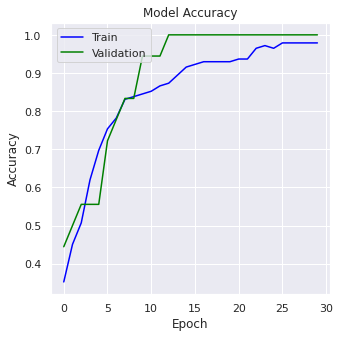

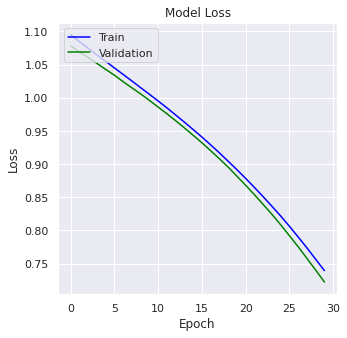

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(wine_hist.history['accuracy'], color = 'blue')
plt.plot(wine_hist.history['val_accuracy'], color = 'green')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (5,5))
plt.plot(wine_hist.history['loss'], color = 'blue')
plt.plot(wine_hist.history['val_loss'], color = 'green')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()